In [1]:
import pandas as pd
df = pd.read_csv('dataset/organics.csv')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 17 columns):
CUSTID          22223 non-null int64
GENDER          19711 non-null object
DOB             22223 non-null object
EDATE           22223 non-null object
AGE             20715 non-null float64
AGEGRP1         20715 non-null object
AGEGRP2         20715 non-null object
NGROUP          21549 non-null object
NEIGHBORHOOD    21549 non-null float64
LCDATE          21942 non-null object
ORGANICS        22223 non-null int64
BILL            22223 non-null float64
REGION          21758 non-null object
CLASS           22223 non-null object
ORGYN           22223 non-null int64
AFFL            21138 non-null float64
LTIME           21942 non-null float64
dtypes: float64(5), int64(3), object(9)
memory usage: 2.9+ MB
None


In [3]:
print(df.head())

   CUSTID GENDER         DOB       EDATE   AGE AGEGRP1 AGEGRP2        TV_REG  \
0     140      U  1921-09-16  1998-02-23  76.0   60-80   70-80  Wales & West   
1     620      U  1949-02-12  1998-02-23  49.0   40-60   40-50  Wales & West   
2     868      F  1927-11-27  1998-02-23  70.0   60-80   70-80  Wales & West   
3    1120      M  1932-04-10  1998-02-23  65.0   60-80   60-70      Midlands   
4    2313      F  1929-05-21  1998-02-23  68.0   60-80   60-70      Midlands   

  NGROUP  NEIGHBORHOOD      LCDATE  ORGANICS      BILL    REGION   CLASS  \
0      C          16.0  1994-11-07         0  16000.00  Midlands    Gold   
1      D          35.0  1993-06-04         0   6000.00  Midlands    Gold   
2      D          27.0  1990-08-02         1      0.02  Midlands  Silver   
3      F          51.0  1991-07-01         1      0.01  Midlands     Tin   
4      A           4.0  1990-03-01         0      0.01  Midlands     Tin   

   ORGYN  AFFL  LTIME  
0      0  10.0    4.0  
1      0   4.0

# 1. Can you identify any clear patterns by initial exploration of the data using histogram or box plot?

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# get the average age of donors, grouped by their lapsing information
print(df.groupby(['ORGYN'])['AGE'].mean())

ORGYN
0    56.080435
1    46.806275
Name: AGE, dtype: float64


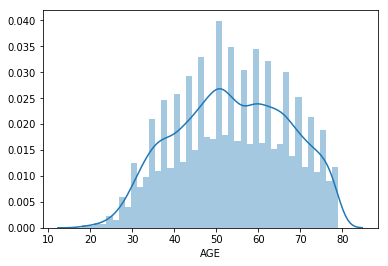

In [10]:
# dropna is used because 'AGE' has missing values
dg = sns.distplot(df['AGE'].dropna())
plt.show()

From the plot above, we can see most organic product buyers are between 40 to 80 years old.

In [11]:
# get the value count of each gender
print("Raw count of genders of organics purchased or not")
print(df.groupby(['ORGYN'])['GENDER'].value_counts())

print("------------------")

# add normalisation to get the relative frequency
print("Normalised count (percentage) of genders of organics purchased or not")
print(df.groupby(['ORGYN'])['GENDER'].value_counts(normalize=True))

Raw count of genders of organics purchased or not
ORGYN  GENDER
0      F         7944
       M         4849
       U         1642
1      F         4205
       M          966
       U          105
Name: GENDER, dtype: int64
------------------
Normalised count (percentage) of genders of organics purchased or not
ORGYN  GENDER
0      F         0.550329
       M         0.335920
       U         0.113751
1      F         0.797005
       M         0.183093
       U         0.019901
Name: GENDER, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

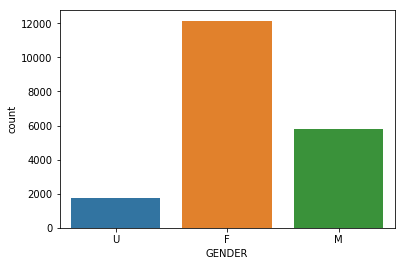

In [13]:
dg = sns.countplot(data=df, x='GENDER')
plt.show()

From the bar chart above, we can see most organic product buyers are females.

In [14]:
print(df.groupby(['ORGYN'])['BILL'].mean())

ORGYN
0    4767.247335
1    3367.834975
Name: BILL, dtype: float64


In [15]:
print(df.groupby(['ORGYN'])['BILL'].mean())

ORGYN
0    4767.247335
1    3367.834975
Name: BILL, dtype: float64


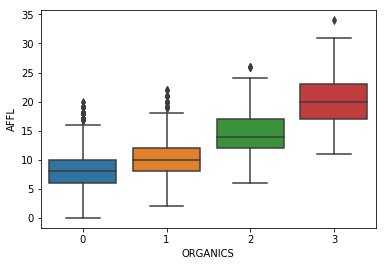

In [16]:
ax = sns.boxplot(x="ORGANICS", y="AFFL", data=df)
plt.show()

The more affluent the customers are, the more organics they purchase.

# 2. What is the proportion of individuals who purchased organic products?

In [15]:
print(df['ORGYN'].value_counts(normalize=True))

0    0.752284
1    0.247716
Name: ORGYN, dtype: float64


# 3. Did you have to fix any data quality problems? Detail them.

- GENDER (Some data missing, use the most frequent)
- AGE (Some missing, have to calculate by EDATE-DOB)
- TV_REG (Not written in the same standard, not useful)
- AFFL

In [9]:
from datetime import datetime

from datetime import timedelta

date1 = df['EDATE']

datetime1 = [datetime.strptime(x,'%Y-%m-%d') for x in date1]


date2 = df['DOB']

datetime2 = [datetime.strptime(x,'%Y-%m-%d') for x in date2]

timespan = datetime1[1] - datetime2[1]
timespan

datetime.timedelta(17908)

In [11]:
df['AGE'] = pd.to_datetime(df['EDATE']) - pd.to_datetime(df['DOB'])
df['AGE']

0       27919 days
1       17908 days
2       25656 days
3       24060 days
4       25115 days
5       26305 days
6       27168 days
7       22728 days
8       22633 days
9       15858 days
10      22195 days
11      20143 days
12      18844 days
13      23434 days
14      13537 days
15      20020 days
16      25766 days
17      15681 days
18      11408 days
19      18148 days
20      24374 days
21      27365 days
22      25629 days
23      24233 days
24      16904 days
25      14523 days
26      27659 days
27      26499 days
28      15737 days
29      22688 days
           ...    
22193   27986 days
22194   14580 days
22195   23927 days
22196   14296 days
22197   26278 days
22198   12257 days
22199   17716 days
22200   18733 days
22201   22025 days
22202   24056 days
22203   11921 days
22204   25409 days
22205   12797 days
22206   11367 days
22207   15165 days
22208   12395 days
22209   15140 days
22210   22965 days
22211   11208 days
22212   19922 days
22213   15867 days
22214   1545

In [6]:
len(df['NEIGHBORHOOD'])

21758

In [24]:
df['REGION']

0          Midlands
1          Midlands
2          Midlands
3          Midlands
4          Midlands
5             North
6          Midlands
7             North
8          Midlands
9               NaN
10            North
11       South East
12         Midlands
13       South East
14       South East
15         Midlands
16         Midlands
17         Midlands
18         Scottish
19       South East
20         Midlands
21         Midlands
22         Midlands
23       South East
24       South East
25         Midlands
26         Midlands
27         Midlands
28            North
29         Midlands
            ...    
22193         North
22194    South East
22195    South East
22196      Midlands
22197    South East
22198      Midlands
22199      Midlands
22200    South East
22201         North
22202         North
22203    South East
22204    South West
22205    South East
22206    South East
22207    South East
22208    South East
22209    South West
22210    South East
22211         North


In [3]:
print(pd.isna(df['NEIGHBORHOOD']).value_counts())

False    21549
True       674
Name: NEIGHBORHOOD, dtype: int64


In [2]:
for i in range(len(df)):
    if pd.isna(df['REGION'][i]):
        df.drop(i, inplace=True)
for j in range(len(df)):
    if pd.isna(df['NEIGHBORHOOD'][j]):
        df.drop(j, inplace=True)
len(df)

KeyError: 9

In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv('dataset/organics.csv')

def data_prep():
    
    #Replace missing data as 'U' in 'GENDER' 
    df['GENDER'].fillna('U')
    
    #Drop TV_REG coloumn
    df.drop(['TV_REG','LCDATE'], axis=1, inplace=True)
    
    #Drop rows that miss value in 'REGION'
    for i in range(len(df)):
    if pd.isna(df['REGION'][i]):
        df.drop(i, inplace=True)


# 4. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

In [ ]:
- GENDER
- DOB
- AGE
- LTIME
- ORGANICS
- BILL
- CLASS
- ORGYN
- AFFL

# 5. What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection.